In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Take a quick look at the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
# Get basic information about the dataset
print(df.info())

print(f"\n{"-"*80}\n")

# Get statistical summary of the dataset
print(df.describe())

print(f"\n{"-"*80}\n")

# Check for missing values
print(df.isnull().sum())

print(f"\n{"-"*80}\n")

# Count the number of samples in each class
print(df['species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

--------------------------------------------------------------------------------

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

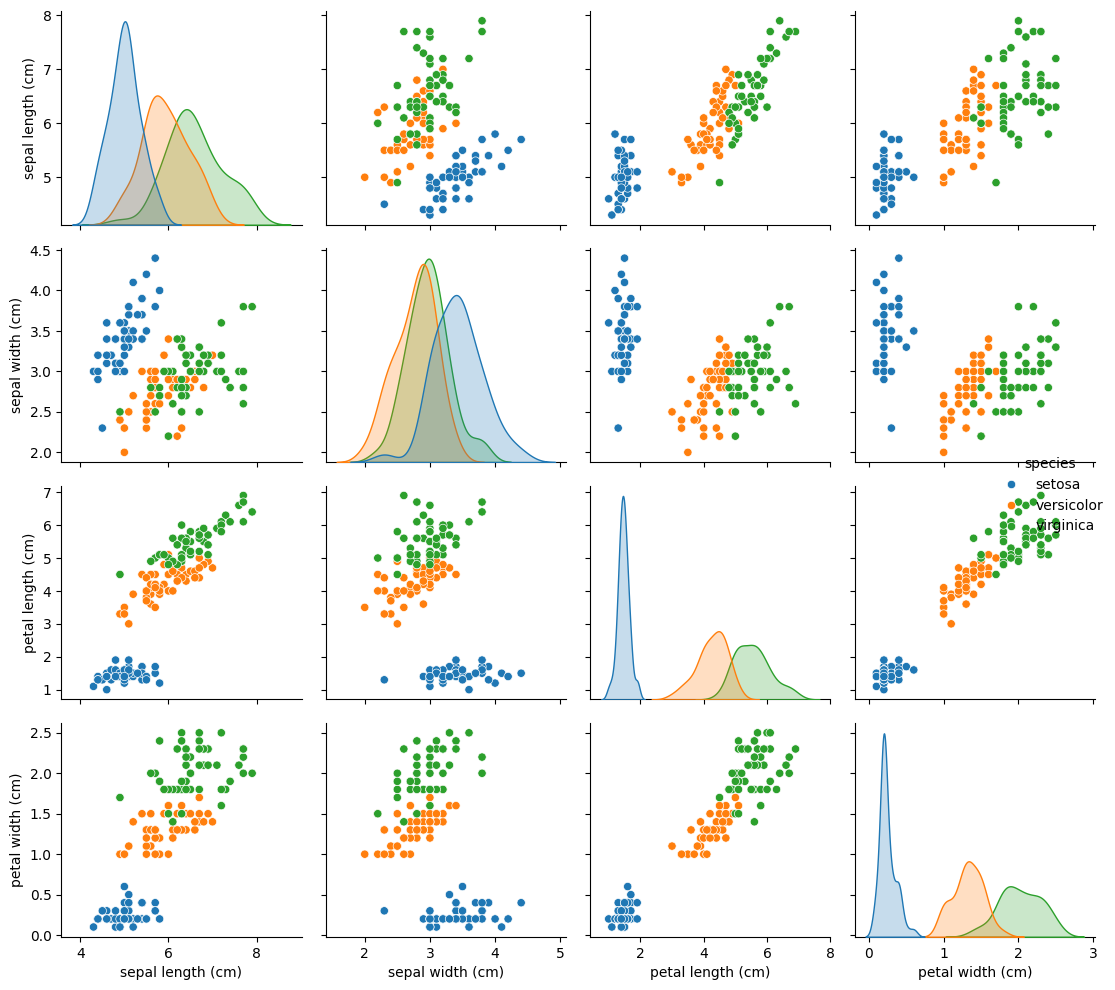

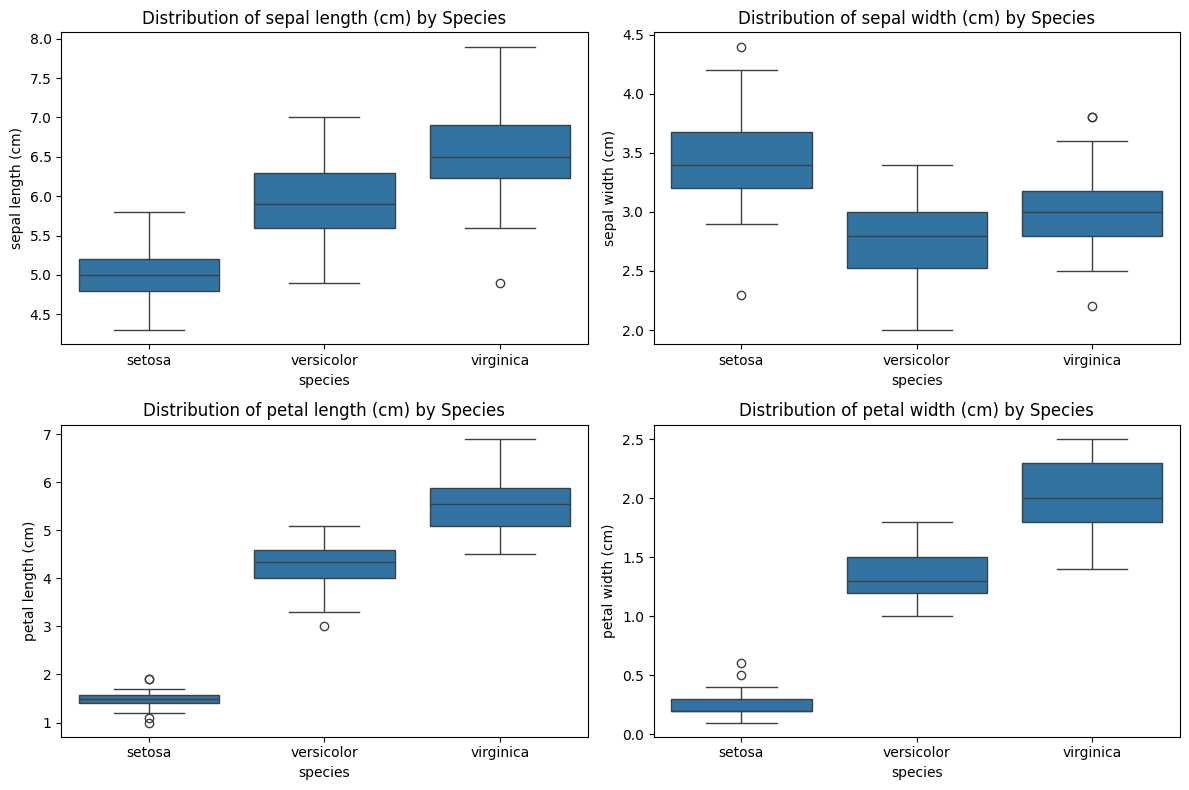

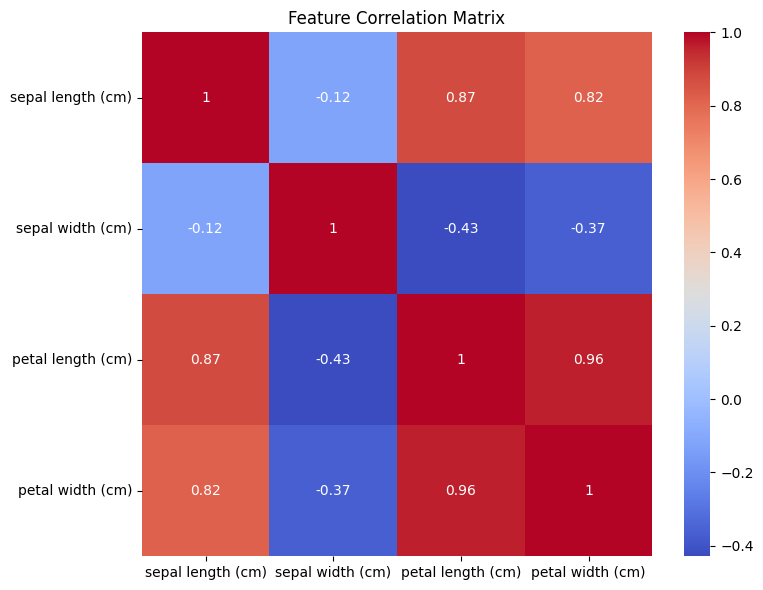

In [3]:
# Create a pairplot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.tight_layout()
plt.show()

# Create box plots to visualize the distribution of each feature by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Species')
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa               0.352490          0.379064           0.173664   
versicolor           0.516171          0.313798           0.469911   
virginica            0.635880          0.322497           0.551895   

            petal width (cm)  
species                       
setosa              0.105386  
versicolor          0.197753  
virginica          

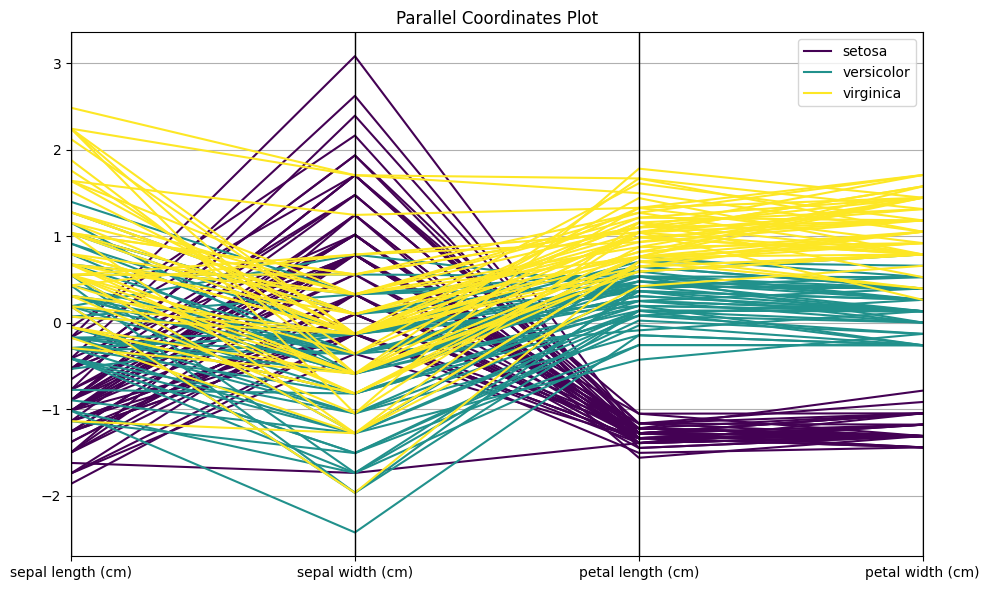

In [4]:
# Calculate group statistics
print(df.groupby('species', observed=False).mean())
print(df.groupby('species', observed=False).std())

# Normalize data for better comparison
df_norm = df.copy()
for feature in iris.feature_names:
    df_norm[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_norm.drop('species', axis=1).join(df['species']), 
                                'species', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.tight_layout()
plt.show()